<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Scaler_Clustering__Scaler_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('scaler_hashed_for_students.csv')

In [ ]:
import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z ]+','', string)
    return new_string


In [ ]:
#what happens here
mystring='\tAirtel\\\\&&**()90 X Labs'
re.sub('[^A-Za-z0-9 ]+', '', mystring)

'Airtel90 X Labs'

In [ ]:
#what happens here
mystring='movie (1990)'
re.sub('[^0-9]', '', mystring)

'1990'

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
df
#sde, sde 2

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper
2,Others,2015.0,2000000,2020.0,7.0,backend engineer
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper
...,...,...,...,...,...,...
145701,ioklnz,2019.0,950000,2021.0,3.0,backend engineer
145702,jinslagkqkkolih,2021.0,1000000,2021.0,1.0,backend engineer
145704,lft suwzoukwsiukn,2016.0,1500000,2021.0,6.0,fullstack devloper
145705,cduuedhga,2019.0,1100000,2021.0,3.0,data scientist


In [ ]:
pd.DataFrame(df.job_position.value_counts())[50:60]

,job_position
senior associate,9
team lead,9
software engineer 1,9
application development analyst,9
senior software engineer backend,8
product developer,8
sr software engineer,8
associate software engineer,8
software developer 2,8
application developer 1,7


# Data Preprocessing - Cleaning of the all variables

In [ ]:
df.drop(columns=['email_hash','Unnamed: 0'],inplace=True)
#dropping email will create different records and there will be no confusion for clustering

In [ ]:
df.job_position=df.job_position.apply(lambda x: remove_special(str(x)))
df.job_position=df.job_position.apply(lambda x: x.lower())
df.job_position=df.job_position.apply(lambda x: x.strip())
df.job_position

0                      other
1         fullstack engineer
2           backend engineer
3           backend engineer
4         fullstack engineer
                 ...        
205838                   nan
205839                   nan
205840                   nan
205841                   nan
205842                   nan
Name: job_position, Length: 205843, dtype: object

In [ ]:
df.shape

(205843, 5)

In [ ]:
  df.drop_duplicates(inplace=True)
  df.shape

(188247, 5)

In [ ]:
df['company_hash'].value_counts().sort_index()

0                                 2
0000                              1
01 fauzota                        2
05gu bsuezknwe josvkwz nshswzc    2
1                                 2
                                 ..
zzhjekfaf nwc                     1
zzhzqz fibw wzle                  1
zzm wzleuinitszf                  3
zzqansbz sul                      1
zzqaukdrkos                       1
Name: company_hash, Length: 37299, dtype: int64

In [ ]:
df.company_hash=df.company_hash.apply(lambda x: remove_special(str(x)))
df.company_hash=df.company_hash.apply(lambda x: x.lower())
df.company_hash=df.company_hash.apply(lambda x: x.strip())
df.company_hash

0                    czniswwz sucsk
1         oznskulz subilihh nshswzc
2                     faulwklwsl ks
3                         wirijzcsk
4                        osbw toidj
                    ...            
205838                    kjjnz sul
205839                    djtokclih
205840                     kllinswz
205841               uiw kjjnslkgnz
205842               hiotku fwkunza
Name: company_hash, Length: 188247, dtype: object

In [ ]:
df['company_hash'].value_counts().sort_index()

                                    85
a h hiwiof jvw nwc                   1
a h n                                2
a hzcsk nkgf                        29
a kysf findwsiuf josvkwz nshswzc     2
                                    ..
zzhjekfaf nwc                        1
zzhzqz fibw wzle                     1
zzm wzleuinitszf                     3
zzqansbz sul                         1
zzqaukdrkos                          1
Name: company_hash, Length: 37208, dtype: int64

In [ ]:
print(df.shape)
print(df.drop_duplicates().shape)
df.drop_duplicates(inplace=True)

(188247, 5)
(188246, 5)


In [ ]:
#removing rows where company or job_position is not available
df=df[ ~((df['company_hash']=='') | (df['job_position']==''))]

In [ ]:
df.shape

(188153, 5)

### Filling Null values using Mean Target Inputation for Orgyear

In [ ]:
df['orgyear'].isnull().sum()

86

In [ ]:
company_median_org_year=df.groupby('company_hash')['orgyear'].median()

In [ ]:
company_median_org_year

company_hash
a h hiwiof jvw nwc                  2006.0
a h n                               2016.0
a hzcsk nkgf                        2014.0
a kysf findwsiuf josvkwz nshswzc    2013.0
adadfwd suwodhzuwf                  2012.0
                                     ...  
zzhjekfaf nwc                       2012.0
zzhzqz fibw wzle                    2011.0
zzm wzleuinitszf                    2016.0
zzqansbz sul                        2017.0
zzqaukdrkos                         2013.0
Name: orgyear, Length: 37205, dtype: float64

In [ ]:
#Code to impute
#-----------------------------------------------------------------------
import numpy as np
def null_imputation(table_from_which_we_need_to_fill, main_col, null_col):
    if np.isnan(null_col):
        return table_from_which_we_need_to_fill[main_col]
    else:
        return null_col
#-----------------------------------------------------------------------


df['orgyear']=df.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)

/var/folders/qc/486wrwtd4mj2pdzxt66k36c00000gn/T/ipykernel_8139/3886512092.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orgyear']=df.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)


In [ ]:
#you can try the null value imputation using kNN imputation as well

In [ ]:
#if we still have null values, we'll drop it
len(df[df['orgyear'].isnull()])

26

In [ ]:
#dropping remaining null values
df=df[~df['orgyear'].isnull()]

### Checking for outliers in orgyear

In [ ]:
#simple understanding
df.orgyear.value_counts().sort_values(ascending=True)

200.0          1
208.0          1
38.0           1
2204.0         1
1900.0         1
201.0          1
2011.5         1
83.0           1
4.0            1
1977.0         1
1979.0         1
209.0          1
1971.0         1
2101.0         1
1972.0         1
2107.0         1
206.0          1
2106.0         1
1973.0         1
1981.0         1
2027.0         1
1976.0         1
20165.0        2
1970.0         2
5.0            2
1.0            2
2014.5         2
6.0            2
91.0           3
1984.0         3
2.0            3
1982.0         4
2028.0         4
2029.0         5
2031.0         5
1985.0         5
3.0            6
1987.0         6
1986.0         8
2026.0         9
1988.0        10
2025.0        12
0.0           17
1989.0        22
1990.0        38
2024.0        43
1992.0        47
1994.0        65
1993.0        72
1991.0        79
1995.0        94
1996.0       134
1997.0       234
2023.0       245
1998.0       279
1999.0       338
2000.0       491
2002.0       683
2001.0       7

In [ ]:
#removing outliers from orgyear using IQR

q1=df.orgyear.quantile(0.25)
q3=df.orgyear.quantile(0.75)
iqr=q3-q1

df=df.loc[(df.orgyear>=q1-1.5*iqr) & (df.orgyear<=q3+1.5*iqr)]


#removing outliers from ctc using IQR

q1=df.ctc.quantile(0.25)
q3=df.ctc.quantile(0.75)
iqr=q3-q1

df=df.loc[(df.ctc>=q1-1.5*iqr) & (df.ctc<=q3+1.5*iqr)]

In [ ]:
df.orgyear.value_counts().sort_index(ascending=True)

2006.0     1635
2007.0     1821
2008.0     2279
2009.0     3215
2010.0     5004
2011.0     7023
2011.5        1
2012.0     9366
2013.0    11134
2014.0    15090
2014.5        2
2015.0    18535
2016.0    20394
2017.0    20421
2018.0    21335
2019.0    17910
2020.0     9940
2021.0     2900
2022.0      739
2023.0      200
2024.0       32
2025.0       11
Name: orgyear, dtype: int64

In [ ]:
print(df.shape)
print(df.drop_duplicates().shape)
df.drop_duplicates(inplace=True)

(168987, 5)
(168986, 5)


In [ ]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,czniswwz sucsk,2016.0,1100000,other,2020.0
1,oznskulz subilihh nshswzc,2018.0,449999,fullstack engineer,2019.0
2,faulwklwsl ks,2015.0,2000000,backend engineer,2020.0
3,wirijzcsk,2017.0,700000,backend engineer,2019.0
4,osbw toidj,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
205836,gkolnkaf,2011.0,2250000,nan,2019.0
205838,kjjnz sul,2008.0,220000,nan,2019.0
205839,djtokclih,2017.0,500000,nan,2020.0
205840,kllinswz,2021.0,700000,nan,2021.0


In [ ]:
#We see some 'nan's in job_position
df.loc[df['job_position']=='nan','job_position']=np.nan

## Masking companies by renaming it to "Others" having count less than 5

In [ ]:
#making the code
df.company_hash.value_counts()

wkwk liufdnwkula fzovslzf    4111
subifaf                      2910
khkqiu                       2226
litusqkuw                    2115
kllzuwdoz                    1998
                             ... 
gkol sucsk                      1
liuwido                         1
joihklw subiwzle jvw nwc        1
hkvzoslrf mzg fzovslzf          1
lekowzo lihhduslkwsiuf          1
Name: company_hash, Length: 34008, dtype: int64

In [ ]:
df[df.company_hash.map(df.company_hash.value_counts())<=5]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
2,faulwklwsl ks,2015.0,2000000,backend engineer,2020.0
9,snhdy,2019.0,360000,NaN,2019.0
11,wiyfn wzle,2016.0,600000,ios engineer,2021.0
16,rwl sucsk jvw nwc,2013.0,800000,other,2020.0
21,csiu tnigkn,2006.0,1550000,engineering leadership,2019.0
...,...,...,...,...,...
205811,gndz fwkwz cstswkn,2013.0,85000,NaN,2016.0
205815,hkrzhawosj zy khkqiu,2015.0,2400000,NaN,2019.0
205816,licz bnim wzle nnj,2019.0,2200000,NaN,2020.0
205817,lsfli fawzhf,2011.0,3327000,NaN,2019.0


In [ ]:
df['new']=df.company_hash.mask(df.company_hash.map(df.company_hash.value_counts())<=5,'Others')

In [ ]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year,new
0,czniswwz sucsk,2016.0,1100000,other,2020.0,czniswwz sucsk
1,oznskulz subilihh nshswzc,2018.0,449999,fullstack engineer,2019.0,oznskulz subilihh nshswzc
2,faulwklwsl ks,2015.0,2000000,backend engineer,2020.0,Others
3,wirijzcsk,2017.0,700000,backend engineer,2019.0,wirijzcsk
4,osbw toidj,2017.0,1400000,fullstack engineer,2019.0,osbw toidj
...,...,...,...,...,...,...
205836,gkolnkaf,2011.0,2250000,NaN,2019.0,gkolnkaf
205838,kjjnz sul,2008.0,220000,NaN,2019.0,kjjnz sul
205839,djtokclih,2017.0,500000,NaN,2020.0,djtokclih
205840,kllinswz,2021.0,700000,NaN,2021.0,kllinswz


In [ ]:
df[df['new']=='Others'].company_hash.value_counts()

sufeiowf                   5
hafleiinjktz               5
hahiuzarkohk               5
liuwsuzuwkn kt             5
nzwf wokufjiow             5
                          ..
dgzowkn                    1
joihkw                     1
pr wzleuifibw nwc uisck    1
tiintz                     1
lekowzo lihhduslkwsiuf     1
Name: company_hash, Length: 31066, dtype: int64

In [ ]:
#now connecting the dots

In [ ]:
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=5,'Others') if x.name=='company_hash' else x)

In [ ]:
df.company_hash.value_counts()

Others                        46749
wkwk liufdnwkula fzovslzf      4111
subifaf                        2910
khkqiu                         2226
litusqkuw                      2115
                              ...  
ckflzx                            6
fkccnz jisuw wzleuinitszf         6
sufwkuw fafwzhf sul               6
kntiflknz wzleuinitszf sul        6
fdhwiwkn fafwzhf                  6
Name: company_hash, Length: 2943, dtype: int64

In [ ]:
df.drop(columns='new',inplace=True)

KeyError: "['new'] not found in axis"

#### Creating Years of Experience Columns

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(147140, 5)

In [ ]:
#orgyear check
df['orgyear'] = df.apply(lambda x: x['orgyear'] if x['orgyear'] <=
                     2022 else 2022, axis=1)

In [ ]:
df['years_of_experience']=2022-df['orgyear']

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(147101, 6)

In [ ]:
df=df[~df['years_of_experience'].isnull()]

In [ ]:
#ctc_updated_year_check
df['ctc_updated_year'] = df.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] <
                     x['orgyear'] else x['ctc_updated_year'], axis=1)

In [ ]:
#Filling null values with others  -- if not done before
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [ ]:
df.isnull().sum()
#All good now

company_hash           0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(146053, 6)

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,146053.000000,1.460530e+05,146053.000000,146053.000000
mean,2015.449409,1.129327e+06,2019.598454,6.550591
std,3.300264,7.439632e+05,1.339107,3.300264
min,2006.000000,2.000000e+00,2015.000000,0.000000
25%,2013.000000,5.700000e+05,2019.000000,4.000000
50%,2016.000000,9.600000e+05,2020.000000,6.000000
75%,2018.000000,1.560000e+06,2021.000000,9.000000
max,2022.000000,3.330000e+06,2022.000000,16.000000


In [ ]:
#pd.DataFrame(df['job_position'].value_counts()).to_csv('scaler_job_positions.csv')

# Spell Check or Manual mapping to fix the errors in Job Titles

In [ ]:
# find those words that may be misspelled
#from spellchecker import SpellChecker

#spell = SpellChecker()

#misspelled = spell.unknown(list(df['company'].values)[:10])
#dicter={}
#for word in misspelled:
    # Get the one `most likely` answer
#    dicter[word]=spell.correction(word)

#print(dicter)



In [ ]:
#merge the mapping with the original one
job_map=pd.read_csv('scaler_job_positions_mapping VX.csv')

In [ ]:
job_map[:100]

,Original,New
0,7,others
1,91,others
2,737,others
3,857628,others
4,896651,others
5,a group chat application,others
6,abap developer,abap developer
7,account,account
8,administrative clerk,administrative clerk
9,administrator,administrator


In [ ]:
job_map.shape

(801, 2)

In [ ]:
job_map.drop_duplicates(inplace=True)

In [ ]:
df=df.merge(job_map, left_on='job_position', right_on='Original', how='left')

In [ ]:
df.shape

(146053, 8)

In [ ]:
df.isnull().sum()

company_hash               0
orgyear                    0
ctc                        0
job_position               0
ctc_updated_year           0
years_of_experience        0
Original               32974
New                    32974
dtype: int64

In [ ]:
df.drop(columns=['job_position','Original'],inplace=True)
df['job_position']=df['New']
df.drop(columns=['New'],inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(145726, 6)

In [ ]:
df=df[~(df['job_position'].isnull())]

In [ ]:
df.shape

(112824, 6)

## Manual Clustering based on company, job position and years of experience

In [ ]:
grouped_c_j_y=df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()

In [ ]:
grouped_c_j_y

count  \
years_of_experience job_position       company_hash                       
0.0                 analyst programmer Others                       1.0   
                    android engineer   Others                       5.0   
                                       esrz hzffzutzo               1.0   
                                       kllzuwdoz                    1.0   
                                       sh  k fwdczuw                2.0   
...                                                                 ...   
16.0                support engineer   subio                        1.0   
                                       tf nkg                       1.0   
                                       uku                          1.0   
                                       wkwk liufdnwkula fzovslzf    1.0   
                    team lead          jzofsfwzuw fafwzhf           1.0   

                                                                       mean  \
years_of_experience job_position       company_hash                           
0.0                 analyst programmer Others                      360000.0   
                    android engineer   Others                      706000.0   
                                       esrz hzffzutzo              300000.0   
                                       kllzuwdoz                   450000.0   
                                       sh  k fwdczuw              1350000.0   
...                                                                     ...   
16.0                support engineer   subio                       900000.0   
                                       tf nkg                     1350000.0   
                                       uku                         400000.0   
                                       wkwk liufdnwkula fzovslzf  1500000.0   
                    team lead          jzofsfwzuw fafwzhf         1600000.0   

                                                                           std  \
years_of_experience job_position       company_hash                              
0.0                 analyst programmer Others                              NaN   
                    android engineer   Others                     4.417918e+05   
                                       esrz hzffzutzo                      NaN   
                                       kllzuwdoz                           NaN   
                                       sh  k fwdczuw              1.626346e+06   
...                                                                        ...   
16.0                support engineer   subio                               NaN   
                                       tf nkg                              NaN   
                                       uku                                 NaN   
                                       wkwk liufdnwkula fzovslzf           NaN   
                    team lead          jzofsfwzuw fafwzhf                  NaN   

                                                                        min  \
years_of_experience job_position       company_hash                           
0.0                 analyst programmer Others                      360000.0   
                    android engineer   Others                      100000.0   
                                       esrz hzffzutzo              300000.0   
                                       kllzuwdoz                   450000.0   
                                       sh  k fwdczuw               200000.0   
...                                                                     ...   
16.0                support engineer   subio                       900000.0   
                                       tf nkg                     1350000.0   
                                       uku                         400000.0   
                                       wkwk liufdnwkula fzovslzf  1500000.0   
                    team lead          jzofsfwz

In [ ]:
df_cjy=df.merge(grouped_c_j_y, on=['years_of_experience','job_position','company_hash'], how='left')

In [ ]:
df_cjy.sort_values(['years_of_experience','job_position','company_hash'])

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max
19778,Others,2022.0,360000,2022.0,0.0,analyst programmer,1.0,360000.0,NaN,360000.0,360000.0,360000.0,360000.0,360000.0
3354,Others,2022.0,480000,2022.0,0.0,android engineer,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
13161,Others,2022.0,1200000,2022.0,0.0,android engineer,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
23736,Others,2022.0,100000,2022.0,0.0,android engineer,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
82918,Others,2022.0,1050000,2022.0,0.0,android engineer,5.0,706000.0,441791.806171,100000.0,480000.0,700000.0,1050000.0,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56015,subio,2006.0,900000,2021.0,16.0,support engineer,1.0,900000.0,NaN,900000.0,900000.0,900000.0,900000.0,900000.0
75812,tf nkg,2006.0,1350000,2019.0,16.0,support engineer,1.0,1350000.0,NaN,1350000.0,1350000.0,1350000.0,1350000.0,1350000.0
10672,uku,2006.0,400000,2021.0,16.0,support engineer,1.0,400000.0,NaN,400000.0,400000.0,400000.0,400000.0,400000.0
27315,wkwk liufdnwkula fzovslzf,2006.0,1500000,2021.0,16.0,support engineer,1.0,1500000.0,NaN,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0


In [ ]:
df_cjy.drop_duplicates(inplace=True)
df_cjy.shape
#no change till now

(112824, 14)

### Creating Designation basis on the salary they are getting in their respective company

In [ ]:
def condition_designation(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [ ]:
df.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper
2,Others,2015.0,2000000,2020.0,7.0,backend engineer
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper


In [ ]:
df_cjy['designation'] =df_cjy.apply(lambda x: condition_designation(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_cjy.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max,designation
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0,1
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [ ]:
df_cjy.designation.value_counts(normalize=True)*100

2    45.435368
3    33.298766
1    21.265865
Name: designation, dtype: float64

## Manual Clustering based on company and job position

In [ ]:
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()

In [ ]:
grouped_c_j

,,count,mean,std,min,25%,50%,75%,max
job_position,company_hash,,,,,,,,
abap developer,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
account,uiw kjjnslkgnz klliduw,1.0,2000000.0,NaN,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0
administrative clerk,Others,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
administrator,Others,1.0,380000.0,NaN,380000.0,380000.0,380000.0,380000.0,380000.0
advisor,bsf,1.0,360000.0,NaN,360000.0,360000.0,360000.0,360000.0,360000.0
...,...,...,...,...,...,...,...,...,...
web designer intern,wez fjkorf biduckwsiu,1.0,420000.0,NaN,420000.0,420000.0,420000.0,420000.0,420000.0
web developer full stack,kuiwezo lihjkua,1.0,300000.0,NaN,300000.0,300000.0,300000.0,300000.0,300000.0
webcenter consultant,nkofzu widgoi subiwzle nwc,1.0,300000.0,NaN,300000.0,300000.0,300000.0,300000.0,300000.0


In [ ]:
df

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper
2,Others,2015.0,2000000,2020.0,7.0,backend engineer
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper
...,...,...,...,...,...,...
145701,ioklnz,2019.0,950000,2021.0,3.0,backend engineer
145702,jinslagkqkkolih,2021.0,1000000,2021.0,1.0,backend engineer
145704,lft suwzoukwsiukn,2016.0,1500000,2021.0,6.0,fullstack devloper
145705,cduuedhga,2019.0,1100000,2021.0,3.0,data scientist


In [ ]:
df.drop_duplicates().shape

(112824, 6)

In [ ]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')

In [ ]:
df_cj

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,2.0,1.085000e+06,21213.203436,1070000.0,1077500.00,1085000.0,1092500.0,1100000.0
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,25.0,9.882000e+05,487499.789590,300000.0,600000.00,850000.0,1380000.0,2000000.0
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,3871.0,1.001007e+06,812465.827695,1000.0,300000.00,830000.0,1530000.0,3300000.0
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,24.0,1.416667e+06,545341.270627,520000.0,1047500.00,1375000.0,1792500.0,2600000.0
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,3.0,8.466667e+05,480138.868801,540000.0,570000.00,600000.0,1000000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112819,ioklnz,2019.0,950000,2021.0,3.0,backend engineer,633.0,1.447947e+06,702632.095190,7500.0,950000.00,1300000.0,1900000.0,3300000.0
112820,jinslagkqkkolih,2021.0,1000000,2021.0,1.0,backend engineer,16.0,1.089375e+06,519249.085299,330000.0,819999.25,965000.0,1325000.0,2500000.0
112821,lft suwzoukwsiukn,2016.0,1500000,2021.0,6.0,fullstack devloper,7.0,1.481429e+06,659353.940648,550000.0,1050000.00,1500000.0,1860000.0,2500000.0
112822,cduuedhga,2019.0,1100000,2021.0,3.0,data scientist,26.0,1.214154e+06,448166.994975,31000.0,1025000.00,1195000.0,1400000.0,2000000.0


In [ ]:
df_cj.sort_values(['company_hash','job_position','years_of_experience'])
# [df_cj.sort_values(['company','job_position','years_of_experience'])['company']=='Amazon'][:2]
# df_cj.sort_values(['company','job_position','years_of_experience'])[df_cj.sort_values(['company','job_position','years_of_experience'])['company']=='Amazon'][:2]

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max
46958,Others,2018.0,500000,2021.0,4.0,abap developer,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
20396,Others,2015.0,500000,2021.0,7.0,administrative clerk,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
2800,Others,2020.0,380000,2020.0,2.0,administrator,1.0,380000.0,NaN,380000.0,380000.0,380000.0,380000.0,380000.0
39108,Others,2016.0,1290000,2019.0,6.0,advisory software engineer,1.0,1290000.0,NaN,1290000.0,1290000.0,1290000.0,1290000.0,1290000.0
24075,Others,2010.0,360000,2021.0,12.0,agency collection manager,1.0,360000.0,NaN,360000.0,360000.0,360000.0,360000.0,360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82661,zyyiuhigsn,2012.0,1800000,2019.0,10.0,data scientist,1.0,1800000.0,NaN,1800000.0,1800000.0,1800000.0,1800000.0,1800000.0
100656,zyyiuhigsn,2010.0,2500000,2019.0,12.0,engineering leadership,1.0,2500000.0,NaN,2500000.0,2500000.0,2500000.0,2500000.0,2500000.0
50156,zyyiuhigsn,2011.0,2400000,2019.0,11.0,frontend developer,1.0,2400000.0,NaN,2400000.0,2400000.0,2400000.0,2400000.0,2400000.0
2791,zyyiuhigsn,2018.0,1900000,2021.0,4.0,others,2.0,1525000.0,530330.08589,1150000.0,1337500.0,1525000.0,1712500.0,1900000.0


In [ ]:
df_cj.shape

(112824, 14)

In [ ]:
df_cj.drop_duplicates(inplace=True)

In [ ]:
df_cj.shape

(112824, 14)

### Creating Class basis on the salary they are getting in their respective company

In [ ]:
def condition_classs(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1


In [ ]:
df_cj['classs'] =df_cj.apply(lambda x: condition_classs(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_cj

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max,classs
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,2.0,1.085000e+06,21213.203436,1070000.0,1077500.00,1085000.0,1092500.0,1100000.0,1
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,25.0,9.882000e+05,487499.789590,300000.0,600000.00,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,3871.0,1.001007e+06,812465.827695,1000.0,300000.00,830000.0,1530000.0,3300000.0,1
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,24.0,1.416667e+06,545341.270627,520000.0,1047500.00,1375000.0,1792500.0,2600000.0,3
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,3.0,8.466667e+05,480138.868801,540000.0,570000.00,600000.0,1000000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112819,ioklnz,2019.0,950000,2021.0,3.0,backend engineer,633.0,1.447947e+06,702632.095190,7500.0,950000.00,1300000.0,1900000.0,3300000.0,3
112820,jinslagkqkkolih,2021.0,1000000,2021.0,1.0,backend engineer,16.0,1.089375e+06,519249.085299,330000.0,819999.25,965000.0,1325000.0,2500000.0,2
112821,lft suwzoukwsiukn,2016.0,1500000,2021.0,6.0,fullstack devloper,7.0,1.481429e+06,659353.940648,550000.0,1050000.00,1500000.0,1860000.0,2500000.0,2
112822,cduuedhga,2019.0,1100000,2021.0,3.0,data scientist,26.0,1.214154e+06,448166.994975,31000.0,1025000.00,1195000.0,1400000.0,2000000.0,3


In [ ]:
df_cj.classs.value_counts(normalize=True)*100

3    43.105190
2    32.567539
1    24.327271
Name: classs, dtype: float64

In [ ]:
#insight

In [ ]:
# job position that has the highest class
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
backend engineer,8141.0,2.062922e+06,687453.523906,30000.0,1550000.0,2000000.0,2600000.0,3330000.0
fullstack devloper,4738.0,1.843818e+06,688740.772724,59000.0,1350000.0,1750000.0,2360000.0,3330000.0
others,3252.0,1.631203e+06,703559.837379,72000.0,1050000.0,1500000.0,2100000.0,3300000.0
frontend developer,2001.0,1.668149e+06,631746.759730,90000.0,1210000.0,1550000.0,2030000.0,3300000.0
qa engineer,1264.0,1.393021e+06,629618.259158,65000.0,900000.0,1250000.0,1707500.0,3300000.0
data scientist,1014.0,2.004372e+06,657171.138374,115000.0,1600000.0,2000000.0,2500000.0,3310000.0
software developer 1,994.0,1.555315e+06,719455.972181,140000.0,900000.0,1450000.0,2000000.0,3329999.0
devops engineer,927.0,1.750345e+06,626199.257910,400000.0,1300000.0,1670000.0,2137500.0,3300000.0
android engineer,913.0,1.784897e+06,638704.770985,14000.0,1320000.0,1700000.0,2200000.0,3300000.0


In [ ]:
#########
df_cjy.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max,designation
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,456.0,9.609559e+05,776546.830662,1000.0,307500.0,800000.0,1435000.0,3200000.0,1
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [ ]:
df_cj.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max,classs
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,2.0,1.085000e+06,21213.203436,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,25.0,9.882000e+05,487499.789590,300000.0,600000.0,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,3871.0,1.001007e+06,812465.827695,1000.0,300000.0,830000.0,1530000.0,3300000.0,1
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,24.0,1.416667e+06,545341.270627,520000.0,1047500.0,1375000.0,1792500.0,2600000.0,3
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,3.0,8.466667e+05,480138.868801,540000.0,570000.0,600000.0,1000000.0,1400000.0,1


In [ ]:
df_cj.shape

(112824, 15)

In [ ]:
df_cjy.shape

(112824, 15)

In [ ]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [ ]:
df_cj.drop_duplicates().shape

(112824, 7)

In [ ]:
df_cjy.drop_duplicates().shape

(112824, 7)

In [ ]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')

In [ ]:
df_cjy_cj.shape

(112824, 8)

In [ ]:
df_cjy_cj.drop_duplicates().shape

(112824, 8)

In [ ]:
#verify if the join is right or now


## Manual Clustering based on comapny

In [ ]:
grouped_c=df.groupby(['company_hash'])['ctc'].describe()

In [ ]:
df_c=df.merge(grouped_c, on=['company_hash'], how='left')

In [ ]:
df_c.head(5)

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,293.0,1.067873e+06,644402.951971,10000.0,600000.0,880000.0,1500000.0,3200000.0
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,45.0,1.385444e+06,564289.398494,200000.0,1050000.0,1300000.0,1790000.0,2600000.0
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,5.0,9.880000e+05,415595.957632,540000.0,600000.0,1000000.0,1400000.0,1400000.0


In [ ]:
#verify
df_c.sort_values(['company_hash'])

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max
112823,Others,2017.0,1100000,2021.0,5.0,frontend developer,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0
54584,Others,2011.0,660000,2019.0,11.0,fullstack devloper,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0
16131,Others,2018.0,640000,2020.0,4.0,frontend developer,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0
54585,Others,2014.0,1250000,2019.0,8.0,android engineer,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0
54600,Others,2014.0,480000,2019.0,8.0,android engineer,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50156,zyyiuhigsn,2011.0,2400000,2019.0,11.0,frontend developer,8.0,1.803750e+06,850276.215625,80000.0,1637500.0,1900000.0,2425000.0,2700000.0
2791,zyyiuhigsn,2018.0,1900000,2021.0,4.0,others,8.0,1.803750e+06,850276.215625,80000.0,1637500.0,1900000.0,2425000.0,2700000.0
16226,zyyiuhigsn,2018.0,80000,2020.0,4.0,backend engineer,8.0,1.803750e+06,850276.215625,80000.0,1637500.0,1900000.0,2425000.0,2700000.0
83334,zyyiuhigsn,2012.0,2700000,2021.0,10.0,backend engineer,8.0,1.803750e+06,850276.215625,80000.0,1637500.0,1900000.0,2425000.0,2700000.0


In [ ]:
print(df.drop_duplicates().shape)
print(df_c.shape)
print(df_c.drop_duplicates().shape)


(112824, 6)
(112824, 14)
(112824, 14)


### Creating Tier basis on the salary in the companies

In [ ]:
def condition_tier(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1

In [ ]:
df_c['tier'] =df_c.apply(lambda x: condition_tier(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_c.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,count,mean,std,min,25%,50%,75%,max,tier
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,293.0,1.067873e+06,644402.951971,10000.0,600000.0,880000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0,1
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,45.0,1.385444e+06,564289.398494,200000.0,1050000.0,1300000.0,1790000.0,2600000.0,3
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,5.0,9.880000e+05,415595.957632,540000.0,600000.0,1000000.0,1400000.0,1400000.0,2


In [ ]:
df_c.tier.value_counts(normalize=True)*100

3    47.899383
2    28.177515
1    23.923101
Name: tier, dtype: float64

In [ ]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')

In [ ]:
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,classs,designation,count,mean,std,min,25%,50%,75%,max,tier
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,1,2,9.0,1.115667e+06,458111.885897,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,3,3,293.0,1.067873e+06,644402.951971,10000.0,600000.0,880000.0,1500000.0,3200000.0,3
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,1,1,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0,1
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,3,3,45.0,1.385444e+06,564289.398494,200000.0,1050000.0,1300000.0,1790000.0,2600000.0,3
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,1,2,5.0,9.880000e+05,415595.957632,540000.0,600000.0,1000000.0,1400000.0,1400000.0,2
5,ekjjsna duhkooszc hkorzwsut jvw nwc,2018.0,700000,2020.0,4.0,fullstack devloper,2,2,6.0,9.066667e+05,539728.326722,620000.0,640000.0,700000.0,775000.0,2000000.0,2
6,pjhiotku lekfz li,2018.0,1500000,2019.0,4.0,fullstack devloper,3,3,662.0,1.712295e+06,677124.221498,11000.0,1300000.0,1685000.0,2127500.0,3300000.0,3
7,kllzuwdoz wzleuinita,2019.0,400000,2019.0,3.0,backend engineer,3,3,14.0,6.864286e+05,307286.064238,300000.0,412500.0,620000.0,910000.0,1150000.0,3
8,uzmtzu fibwmkoz,2019.0,420000,2020.0,3.0,fullstack devloper,3,3,215.0,6.701256e+05,321893.320045,5500.0,480000.0,600000.0,755000.0,2000000.0,3
9,Others,2016.0,600000,2021.0,6.0,ios engineer,3,3,21213.0,9.600989e+05,750047.695406,24.0,400000.0,800000.0,1400000.0,3329999.0,3


In [ ]:
df_cjy_cj_c.shape

(112824, 17)

In [ ]:
data=df_cjy_cj_c.copy(deep=True)

In [ ]:
data.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [ ]:
data.shape

(112824, 9)

In [ ]:
data

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,classs,designation,tier
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,1,2,2
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,3,3,3
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,1,1,1
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,3,3,3
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,1,2,2
...,...,...,...,...,...,...,...,...,...
112819,ioklnz,2019.0,950000,2021.0,3.0,backend engineer,3,3,3
112820,jinslagkqkkolih,2021.0,1000000,2021.0,1.0,backend engineer,2,2,2
112821,lft suwzoukwsiukn,2016.0,1500000,2021.0,6.0,fullstack devloper,2,1,1
112822,cduuedhga,2019.0,1100000,2021.0,3.0,data scientist,3,1,3


# Some more joins and cluster analysis steps (Optional 1)


In [ ]:
company_cluster_n=grouped_c.sort_values(by=['50%','count'], ascending=False).reset_index()
# can check this with less standard deviation

In [ ]:
company_cluster_n

,company_hash,count,mean,std,min,25%,50%,75%,max
0,igfzovzks q nkgf,2.0,3.150000e+06,2.121320e+05,3000000.0,3075000.0,3150000.0,3225000.0,3300000.0
1,suczzclih,9.0,1.999444e+06,1.418891e+06,140000.0,200000.0,3000000.0,3010000.0,3300000.0
2,ekouzffsi,5.0,2.864000e+06,3.622568e+05,2320000.0,2750000.0,2950000.0,3000000.0,3300000.0
3,harkkohk,11.0,2.545455e+06,5.561180e+05,1400000.0,2100000.0,2900000.0,2900000.0,3070000.0
4,kukoilr,6.0,2.600000e+06,7.211103e+05,1400000.0,2250000.0,2850000.0,3075000.0,3300000.0
...,...,...,...,...,...,...,...,...,...
2910,zpkck,13.0,1.918000e+05,2.752249e+05,6000.0,28000.0,60000.0,150000.0,900000.0
2911,lzou,7.0,2.478571e+05,5.081081e+05,45000.0,50000.0,60000.0,65000.0,1400000.0
2912,akuczy,13.0,2.071538e+05,5.393918e+05,20000.0,40000.0,57000.0,85000.0,2000000.0
2913,kualiuuzlw,8.0,2.325000e+05,3.901666e+05,7000.0,7000.0,38500.0,221500.0,1000000.0


In [ ]:
diff=((company_cluster_n['50%'][0:1].values -company_cluster_n['50%'][-1:].values)/3)[0]
diff

1038000.0

In [ ]:
(company_cluster_n['50%'][0:1].values - diff)[0]

2112000.0

In [ ]:
company_cluster_n.loc[company_cluster_n['50%']>=(company_cluster_n['50%'][0:1].values - diff)[0],'company_cluster_n']=1


company_cluster_n.loc[(company_cluster_n['50%']<(company_cluster_n['50%'][0:1].values - diff)[0])
                      &
                      (company_cluster_n['50%']>=(company_cluster_n['50%'][0:1].values - 2*diff)[0])


                      ,'company_cluster_n']=2

company_cluster_n['company_cluster_n'].fillna(3,inplace=True)


In [ ]:
company_cluster_n['company_cluster_n'].value_counts(normalize=True)*100


3.0    57.255575
2.0    39.691252
1.0     3.053173
Name: company_cluster_n, dtype: float64

In [ ]:
####

In [ ]:
company_job_cluster_n=grouped_c_j.sort_values(by=['50%','count'], ascending=False).reset_index() # can check this with less standard deviation

In [ ]:
company_job_cluster_n

,job_position,company_hash,count,mean,std,min,25%,50%,75%,max
0,engineering leadership,gzlrhku lidnwzo,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0
1,product designer,wkwk lnsx,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0
2,frontend developer,liniowirzuf nnj sucsk jvw nwc,1.0,3325000.0,NaN,3325000.0,3325000.0,3325000.0,3325000.0,3325000.0
3,product manager,hkrzhawosjlih,3.0,3200000.0,173205.080757,3000000.0,3150000.0,3300000.0,3300000.0,3300000.0
4,qa engineer,tipzr wzle,2.0,3300000.0,0.000000,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0
...,...,...,...,...,...,...,...,...,...,...
18528,devops engineer,msjoi nwc sucsk,1.0,4000.0,NaN,4000.0,4000.0,4000.0,4000.0,4000.0
18529,others,nirwok,1.0,4000.0,NaN,4000.0,4000.0,4000.0,4000.0,4000.0
18530,technical consultant,uiw kjjnslkgnz klliduw,1.0,2000.0,NaN,2000.0,2000.0,2000.0,2000.0,2000.0
18531,android engineer,vsf lkozzof,1.0,1000.0,NaN,1000.0,1000.0,1000.0,1000.0,1000.0


In [ ]:
diff=((company_job_cluster_n['50%'][0:1].values -company_job_cluster_n['50%'][-1:].values)/3)[0]
diff

1109666.3333333333

In [ ]:
company_job_cluster_n.loc[company_job_cluster_n['50%']>=(company_job_cluster_n['50%'][0:1].values - diff)[0],'company_job_cluster_n']=1


company_job_cluster_n.loc[(company_job_cluster_n['50%']<(company_job_cluster_n['50%'][0:1].values - diff)[0])
                      &
                      (company_job_cluster_n['50%']>=(company_job_cluster_n['50%'][0:1].values - 2*diff)[0])


                      ,'company_job_cluster_n']=2

company_job_cluster_n['company_job_cluster_n'].fillna(3,inplace=True)


In [ ]:
company_job_cluster_n['company_job_cluster_n'].value_counts()

3.0    10633
2.0     6379
1.0     1521
Name: company_job_cluster_n, dtype: int64

## Merging data with these two generated columns

In [ ]:
data_company_n=data.merge(company_cluster_n, on ='company_hash', how='left')

In [ ]:
x=list(data.columns)
x.append('company_cluster_n')
data_company_n=data_company_n[x]

In [ ]:
company_job_cluster_n

,job_position,company_hash,count,mean,std,min,25%,50%,75%,max,company_job_cluster_n
0,engineering leadership,gzlrhku lidnwzo,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0,1.0
1,product designer,wkwk lnsx,1.0,3329999.0,NaN,3329999.0,3329999.0,3329999.0,3329999.0,3329999.0,1.0
2,frontend developer,liniowirzuf nnj sucsk jvw nwc,1.0,3325000.0,NaN,3325000.0,3325000.0,3325000.0,3325000.0,3325000.0,1.0
3,product manager,hkrzhawosjlih,3.0,3200000.0,173205.080757,3000000.0,3150000.0,3300000.0,3300000.0,3300000.0,1.0
4,qa engineer,tipzr wzle,2.0,3300000.0,0.000000,3300000.0,3300000.0,3300000.0,3300000.0,3300000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18528,devops engineer,msjoi nwc sucsk,1.0,4000.0,NaN,4000.0,4000.0,4000.0,4000.0,4000.0,3.0
18529,others,nirwok,1.0,4000.0,NaN,4000.0,4000.0,4000.0,4000.0,4000.0,3.0
18530,technical consultant,uiw kjjnslkgnz klliduw,1.0,2000.0,NaN,2000.0,2000.0,2000.0,2000.0,2000.0,3.0
18531,android engineer,vsf lkozzof,1.0,1000.0,NaN,1000.0,1000.0,1000.0,1000.0,1000.0,3.0


In [ ]:
final_n=data_company_n.merge(company_job_cluster_n, on =['company_hash','job_position'], how='left')

In [ ]:
y=list(data_company_n.columns)
y.append('company_job_cluster_n')
final_n=final_n[y]

In [ ]:
#used this step if we are not doing the option 2
final=final_n.copy()

In [ ]:
final

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,classs,designation,tier,company_cluster_n,company_job_cluster_n
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,1,2,2,3.0,3.0
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,3,3,3,3.0,3.0
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,1,1,1,3.0,3.0
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,3,3,3,2.0,2.0
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,1,2,2,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
112819,ioklnz,2019.0,950000,2021.0,3.0,backend engineer,3,3,3,2.0,2.0
112820,jinslagkqkkolih,2021.0,1000000,2021.0,1.0,backend engineer,2,2,2,3.0,3.0
112821,lft suwzoukwsiukn,2016.0,1500000,2021.0,6.0,fullstack devloper,2,1,1,3.0,2.0
112822,cduuedhga,2019.0,1100000,2021.0,3.0,data scientist,3,1,3,2.0,2.0


# Some more joins and cluster analysis steps (Optional 2)




company_cluster=grouped_c.sort_values(by=['50%','count'], ascending=False).reset_index().reset_index() # can check this with less standard deviation

company_cluster

company_cluster.shape

company_cluster.loc[company_cluster['index']<=round(company_cluster.shape[0]/3),'company_cluster']=1
company_cluster.loc[(company_cluster['index']>round(company_cluster.shape[0]/3))
                    &
                    (company_cluster['index']<=round(2*company_cluster.shape[0]/3))
                    ,'company_cluster']=2

company_cluster.loc[(company_cluster['index']>round(2*company_cluster.shape[0]/3))
                    ,'company_cluster']=3

company_cluster['company_cluster'].value_counts()

company_job_cluster=grouped_c_j.sort_values(by=['50%','count'], ascending=False).reset_index().reset_index() # can check this with less standard deviation

company_job_cluster

company_job_cluster.shape

company_job_cluster.loc[company_job_cluster['index']<=round(company_job_cluster.shape[0]/3),'company_job_cluster']=1
company_job_cluster.loc[(company_job_cluster['index']>round(company_job_cluster.shape[0]/3))
                    &
                    (company_job_cluster['index']<=round(2*company_job_cluster.shape[0]/3))
                    ,'company_job_cluster']=2

company_job_cluster.loc[(company_job_cluster['index']>round(2*company_job_cluster.shape[0]/3))
                    ,'company_job_cluster']=3

company_job_cluster['company_job_cluster'].value_counts()

## Merging data with these two generated columns

data_company=data.merge(company_cluster, on ='company', how='left')

x=list(data.columns)

x.append('company_cluster')

data_company=data_company[x]

final=data_company.merge(company_job_cluster, on =['company','job_position'], how='left')

y=list(data_company.columns)
y.append('company_job_cluster')
final=final[y]

### Definition:

1. **Designation**: Salary an employee is getting wrt salary in the same Company, Job_Position & Years of Experience
2. **Class**: Salary an employee is getting wrt the salary in the same Company & Job_Position
3. **Tier**: Salary an employee is getting wrt the salary in the same Company


![image.png](attachment:image.png)
### Some Questions this data can Answer: <br>
    1. Show creme de la creme records from the data (Filter 1 from all the flags)
    2. What's the current positioning of the employee
    3. Where to next? Pitch (After seeing their present cluster)
    

## Macro Analysis Ex:
Since we are doing clustering at employee level we have to bring characterics of employees only.
1. Top 10 employees (earning more than most of the employees in the company) (tier 1) <br>
    
    1a. Top 10 employees of data science in Amazon / TCS etc earning more than their peers (class 1) <br>
    1b. Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers (class 3) <br>
2. Bottom 10 employees (earning less than most of the employees in the company) (tier 3)
3. Top 10 employees in the amazon- data science- having 5/6/7 years of experience earning more than their peers

## Micro Analysis Examples:
1. Top 10 companies (basis on their offered CTC) - grouped_c, sort by descending, head(10)
2. Top 2 positions in every company (basis on their offered CTC) - grouped_c_j, sort by descending, head(10)

In [ ]:
x=final.copy()

In [ ]:
final.shape

(112824, 11)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112824 entries, 0 to 112823
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           112824 non-null  object 
 1   orgyear                112824 non-null  float64
 2   ctc                    112824 non-null  int64  
 3   ctc_updated_year       112824 non-null  float64
 4   years_of_experience    112824 non-null  float64
 5   job_position           112824 non-null  object 
 6   classs                 112824 non-null  int64  
 7   designation            112824 non-null  int64  
 8   tier                   112824 non-null  int64  
 9   company_cluster_n      112824 non-null  float64
 10  company_job_cluster_n  112824 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 10.3+ MB


# Unsupervised Learning

## KMeans


1. Check Clustering Tendency
2. Do elbow method etc for checking the number of optimal clusters (bring it to 3)
3. Do kmeans clustering
4. Hierarchial clustering of sample dataset (shuffle and take 50k rows)

## Label encoding

In [ ]:
x.shape

(112824, 11)

In [ ]:
x['company_hash'].unique()

array(['czniswwz sucsk', 'oznskulz subilihh nshswzc', 'Others', ...,
       'fknwfscz', 'eajzovzotz sul', 'bkkfif'], dtype=object)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
x['company_hash']= label_encoder.fit_transform(x['company_hash'])

x['company_hash'].unique()

array([ 194, 1846,    0, ...,  503,  250,   43])

In [ ]:
x['job_position']= label_encoder.fit_transform(x['job_position'])
x['job_position'].unique()

array([273, 178,  86, 206, 124, 176, 154, 128, 153,  16, 314, 331, 420,
       492, 349, 143, 296, 304, 110, 293, 494,  85, 132, 327,  27, 535,
        51,   3, 446, 531, 363, 310, 248, 432, 145,  20,  92, 358, 180,
       239, 439, 198, 488, 269, 367, 202, 362, 264,  64, 517, 161,  42,
       440, 163,  47, 292, 449,  45, 426, 201, 294, 152, 466, 157,  58,
       179, 433, 387, 225,  93, 441, 365, 200,  90,  48, 215, 532, 339,
       231, 551, 309, 237,  11, 381,  75, 343, 252, 385, 306, 509, 251,
       451, 500,  66, 543, 516, 370, 164,  87, 335, 397, 295, 101, 361,
       342, 357, 285, 319, 444,  79, 312, 352, 135, 401,  65, 493, 513,
        63, 191, 321, 233, 416, 540, 255, 396, 274, 276, 166, 262, 337,
       328, 241, 423, 158, 368, 430, 224, 246, 541, 268, 108, 480,  99,
       125, 369, 425,  60, 445, 398, 503, 187,  46, 545, 392,  55, 318,
       113, 230, 307, 258, 100, 112,  41,  23, 226, 502, 499, 168, 120,
       372,   4,  59, 148, 412, 409, 486, 244, 461, 278,  13, 13

x=pd.read_csv('suraajcln.csv',index_col=0)

In [ ]:
x.head()

,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,classs,designation,tier,company_cluster_n,company_job_cluster_n
0,194,2016.0,1100000,2020.0,6.0,273,1,2,2,3.0,3.0
1,1846,2018.0,449999,2019.0,4.0,178,3,3,3,3.0,3.0
2,0,2015.0,2000000,2020.0,7.0,86,1,1,1,3.0,3.0
3,2596,2017.0,700000,2019.0,5.0,86,3,3,3,2.0,2.0
4,1815,2017.0,1400000,2019.0,5.0,178,1,2,2,3.0,3.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112824 entries, 0 to 112823
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           112824 non-null  int64  
 1   orgyear                112824 non-null  float64
 2   ctc                    112824 non-null  int64  
 3   ctc_updated_year       112824 non-null  float64
 4   years_of_experience    112824 non-null  float64
 5   job_position           112824 non-null  int64  
 6   classs                 112824 non-null  int64  
 7   designation            112824 non-null  int64  
 8   tier                   112824 non-null  int64  
 9   company_cluster_n      112824 non-null  float64
 10  company_job_cluster_n  112824 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 10.3 MB


In [ ]:
x.drop(columns=['orgyear'],inplace=True)
x.drop(columns=['ctc_updated_year'],inplace=True)
#x.drop(columns=['job_position'],inplace=True)


In [ ]:
x.head()

,company_hash,ctc,years_of_experience,job_position,classs,designation,tier,company_cluster_n,company_job_cluster_n
0,194,1100000,6.0,273,1,2,2,3.0,3.0
1,1846,449999,4.0,178,3,3,3,3.0,3.0
2,0,2000000,7.0,86,1,1,1,3.0,3.0
3,2596,700000,5.0,86,3,3,3,2.0,2.0
4,1815,1400000,5.0,178,1,2,2,3.0,3.0


In [ ]:
x.isnull().sum()

company_hash             0
ctc                      0
years_of_experience      0
job_position             0
classs                   0
designation              0
tier                     0
company_cluster_n        0
company_job_cluster_n    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
# ------- fix X #do this after label encoding
x[['ctc']] = ms.fit_transform(x[['ctc']])
print(x.head())

   company_hash       ctc  years_of_experience  job_position  classs  \
0           194  0.330330                  6.0           273       1   
1          1846  0.135134                  4.0           178       3   
2             0  0.600600                  7.0            86       1   
3          2596  0.210210                  5.0            86       3   
4          1815  0.420420                  5.0           178       1   

   designation  tier  company_cluster_n  company_job_cluster_n  
0            2     2                3.0                    3.0  
1            3     3                3.0                    3.0  
2            1     1                3.0                    3.0  
3            3     3                2.0                    2.0  
4            2     2                3.0                    3.0  


Clustering Tendancy

In [ ]:
!pip install pyclustertend

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [ ]:
x.dropna(inplace=True)

In [ ]:
hop=hopkins(x,150)

In [ ]:
print(hop)

0.0713676212871527


In [ ]:
#o=x.copy(deep=True)

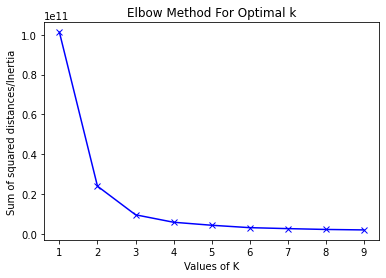

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(x)
  Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(x)
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_.shape)

[[2.35461006e+03 3.27852171e-01 6.42585253e+00 1.81470774e+02
  2.17578125e+00 2.09315123e+00 2.23337705e+00 2.64601391e+00
  2.62371693e+00]
 [1.69934240e+02 3.29850398e-01 7.08094619e+00 1.78127286e+02
  2.20643406e+00 2.15955056e+00 2.24596097e+00 2.71567120e+00
  2.69712596e+00]
 [1.24717313e+03 3.63444890e-01 6.66382445e+00 1.78511543e+02
  2.17741072e+00 2.10045945e+00 2.23868986e+00 2.47799983e+00
  2.49852017e+00]]
(3, 9)


In [ ]:
x['k-m label']=kmeans.fit_predict(x)

In [ ]:
x

,company_hash,ctc,years_of_experience,job_position,classs,designation,tier,company_cluster_n,company_job_cluster_n,k-m label
0,194,0.330330,6.0,273,1,2,2,3.0,3.0,2
1,1846,0.135134,4.0,178,3,3,3,3.0,3.0,0
2,0,0.600600,7.0,86,1,1,1,3.0,3.0,2
3,2596,0.210210,5.0,86,3,3,3,2.0,2.0,0
4,1815,0.420420,5.0,178,1,2,2,3.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...
112819,981,0.285285,3.0,86,3,3,3,2.0,2.0,1
112820,1034,0.300300,1.0,86,2,2,2,3.0,3.0,1
112821,1442,0.450450,6.0,178,2,1,1,3.0,2.0,1
112822,117,0.330330,3.0,128,3,1,3,2.0,2.0,2


In [ ]:
z=final.copy()
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112824 entries, 0 to 112823
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           112824 non-null  object 
 1   orgyear                112824 non-null  float64
 2   ctc                    112824 non-null  int64  
 3   ctc_updated_year       112824 non-null  float64
 4   years_of_experience    112824 non-null  float64
 5   job_position           112824 non-null  object 
 6   classs                 112824 non-null  int64  
 7   designation            112824 non-null  int64  
 8   tier                   112824 non-null  int64  
 9   company_cluster_n      112824 non-null  float64
 10  company_job_cluster_n  112824 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 10.3+ MB


In [ ]:
#x.drop(columns=['company'],inplace=True)
#x.drop(columns=['ctc'],inplace=True)
#x.drop(columns=['orgyear'],inplace=True)
#x.drop(columns=['job_position'],inplace=True)
#x.drop(columns=['ctc_updated_year'],inplace=True)
#x.info()

In [ ]:
x.info()
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112824 entries, 0 to 112823
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           112824 non-null  int64  
 1   ctc                    112824 non-null  float64
 2   years_of_experience    112824 non-null  float64
 3   job_position           112824 non-null  int64  
 4   classs                 112824 non-null  int64  
 5   designation            112824 non-null  int64  
 6   tier                   112824 non-null  int64  
 7   company_cluster_n      112824 non-null  float64
 8   company_job_cluster_n  112824 non-null  float64
 9   k-m label              112824 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 9.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112824 entries, 0 to 112823
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 -

In [ ]:
#q=pd.merge(x, z, how ='inner', on =['years_of_experience', 'tier','classs','designation'])
#q.info()

In [ ]:
q=pd.concat([z,x['k-m label']], axis=1)
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112824 entries, 0 to 112823
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company_hash           112824 non-null  object 
 1   orgyear                112824 non-null  float64
 2   ctc                    112824 non-null  int64  
 3   ctc_updated_year       112824 non-null  float64
 4   years_of_experience    112824 non-null  float64
 5   job_position           112824 non-null  object 
 6   classs                 112824 non-null  int64  
 7   designation            112824 non-null  int64  
 8   tier                   112824 non-null  int64  
 9   company_cluster_n      112824 non-null  float64
 10  company_job_cluster_n  112824 non-null  float64
 11  k-m label              112824 non-null  int32  
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 10.8+ MB


In [ ]:
q


,company_hash,orgyear,ctc,ctc_updated_year,years_of_experience,job_position,classs,designation,tier,company_cluster_n,company_job_cluster_n,k-m label
0,czniswwz sucsk,2016.0,1100000,2020.0,6.0,others,1,2,2,3.0,3.0,2
1,oznskulz subilihh nshswzc,2018.0,449999,2019.0,4.0,fullstack devloper,3,3,3,3.0,3.0,0
2,Others,2015.0,2000000,2020.0,7.0,backend engineer,1,1,1,3.0,3.0,2
3,wirijzcsk,2017.0,700000,2019.0,5.0,backend engineer,3,3,3,2.0,2.0,0
4,osbw toidj,2017.0,1400000,2019.0,5.0,fullstack devloper,1,2,2,3.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
112819,ioklnz,2019.0,950000,2021.0,3.0,backend engineer,3,3,3,2.0,2.0,1
112820,jinslagkqkkolih,2021.0,1000000,2021.0,1.0,backend engineer,2,2,2,3.0,3.0,1
112821,lft suwzoukwsiukn,2016.0,1500000,2021.0,6.0,fullstack devloper,2,1,1,3.0,2.0,1
112822,cduuedhga,2019.0,1100000,2021.0,3.0,data scientist,3,1,3,2.0,2.0,2


In [ ]:
z=x.sample(frac=0.0025)
#the most we could do without crashing

In [ ]:
z=z.drop(columns='k-m label')

In [ ]:
z.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 82496 to 31591
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_hash           282 non-null    int64  
 1   ctc                    282 non-null    float64
 2   years_of_experience    282 non-null    float64
 3   job_position           282 non-null    int64  
 4   classs                 282 non-null    int64  
 5   designation            282 non-null    int64  
 6   tier                   282 non-null    int64  
 7   company_cluster_n      282 non-null    float64
 8   company_job_cluster_n  282 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 22.0 KB


In [ ]:
import sys

In [ ]:
sys.setrecursionlimit(100000)

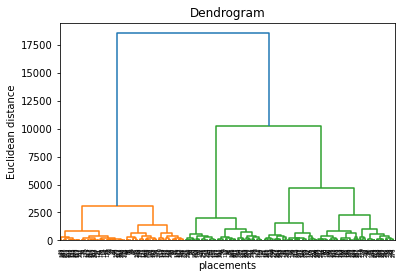

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(z, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('placements')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(z)

AgglomerativeClustering(n_clusters=3)

In [ ]:
z['Aglo-label'] = model.fit_predict(z)

In [ ]:
z.head()

,company_hash,ctc,years_of_experience,job_position,classs,designation,tier,company_cluster_n,company_job_cluster_n,Aglo-label
82496,340,0.450450,4.0,331,2,2,2,3.0,2.0,1
59402,84,0.270270,7.0,176,2,2,3,3.0,3.0,1
7178,0,0.120120,8.0,86,3,3,3,3.0,3.0,1
68983,2737,0.279279,3.0,178,3,1,3,3.0,3.0,2
40788,2662,0.570570,7.0,86,2,2,2,2.0,2.0,2
